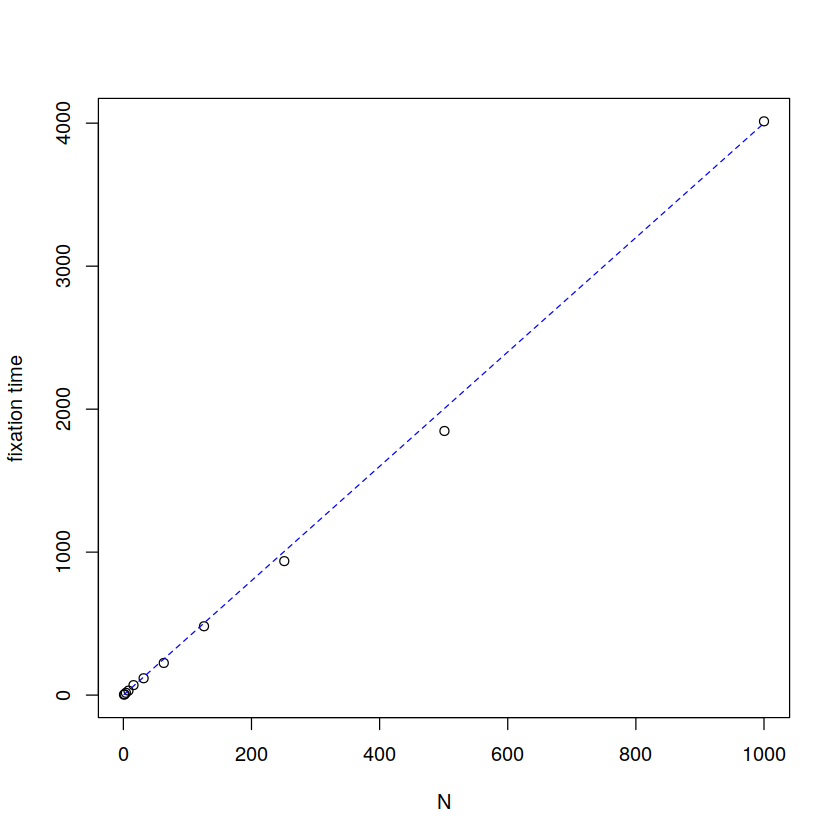

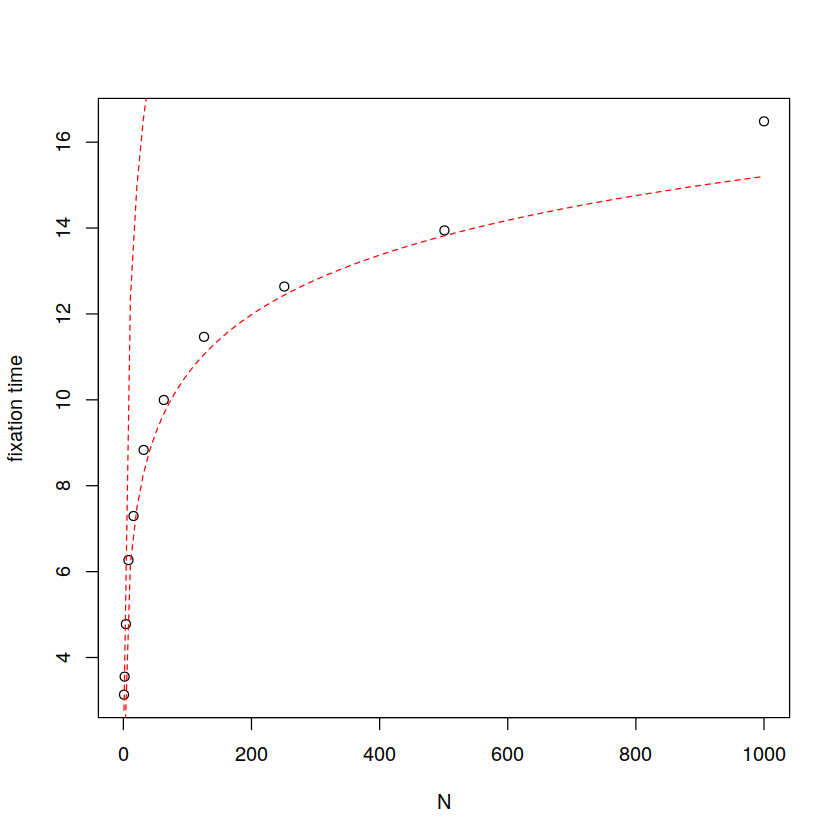

In [3]:
simbin <- function(p0, N, G=10*N) {
	x <- c(round(p0*2*N), rep(0, G))
	for (i in 1:G) {
		x[i+1] <- rbinom(1, 2*N, prob=x[i]/(2*N))
		if(x[i+1] == 0) { break }
		if(x[i+1] == 2*N) { x[(i+2):(G+1)] <- 2*N; break }
	}
	x
}

fixation <- function(p0, N, rep=1000) {
	ans <- replicate(rep, { ss <- simbin(p0, N); c(match(0,ss), 
match(2*N,ss)) })
	rowMeans(ans, na.rm=TRUE)
}

nn <- 10^(seq(0, 3, length.out=11))

plot(nn, sapply(round(nn), function(n) fixation(1/(2*n), n, 
rep=100*n)[2]), xlab="N", ylab="fixation time")
curve(4*x, col="blue", lty=2, add=TRUE)

plot(nn, sapply(round(nn), function(n) fixation(1/(2*n), n, 
rep=100*n)[1]), xlab="N", ylab="fixation time")
curve(2*log(2*x), col="red", lty=2, add=TRUE)
curve(4*log(2*x), col="red", lty=2, add=TRUE)

In [9]:
(2*log(2*10))/2

[1] 2.995732